In [106]:
import warnings, requests, zipfile, io
warnings.simplefilter('ignore')
import pandas as pd
df = pd.read_csv (r'winequality-red.csv')

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [108]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [109]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

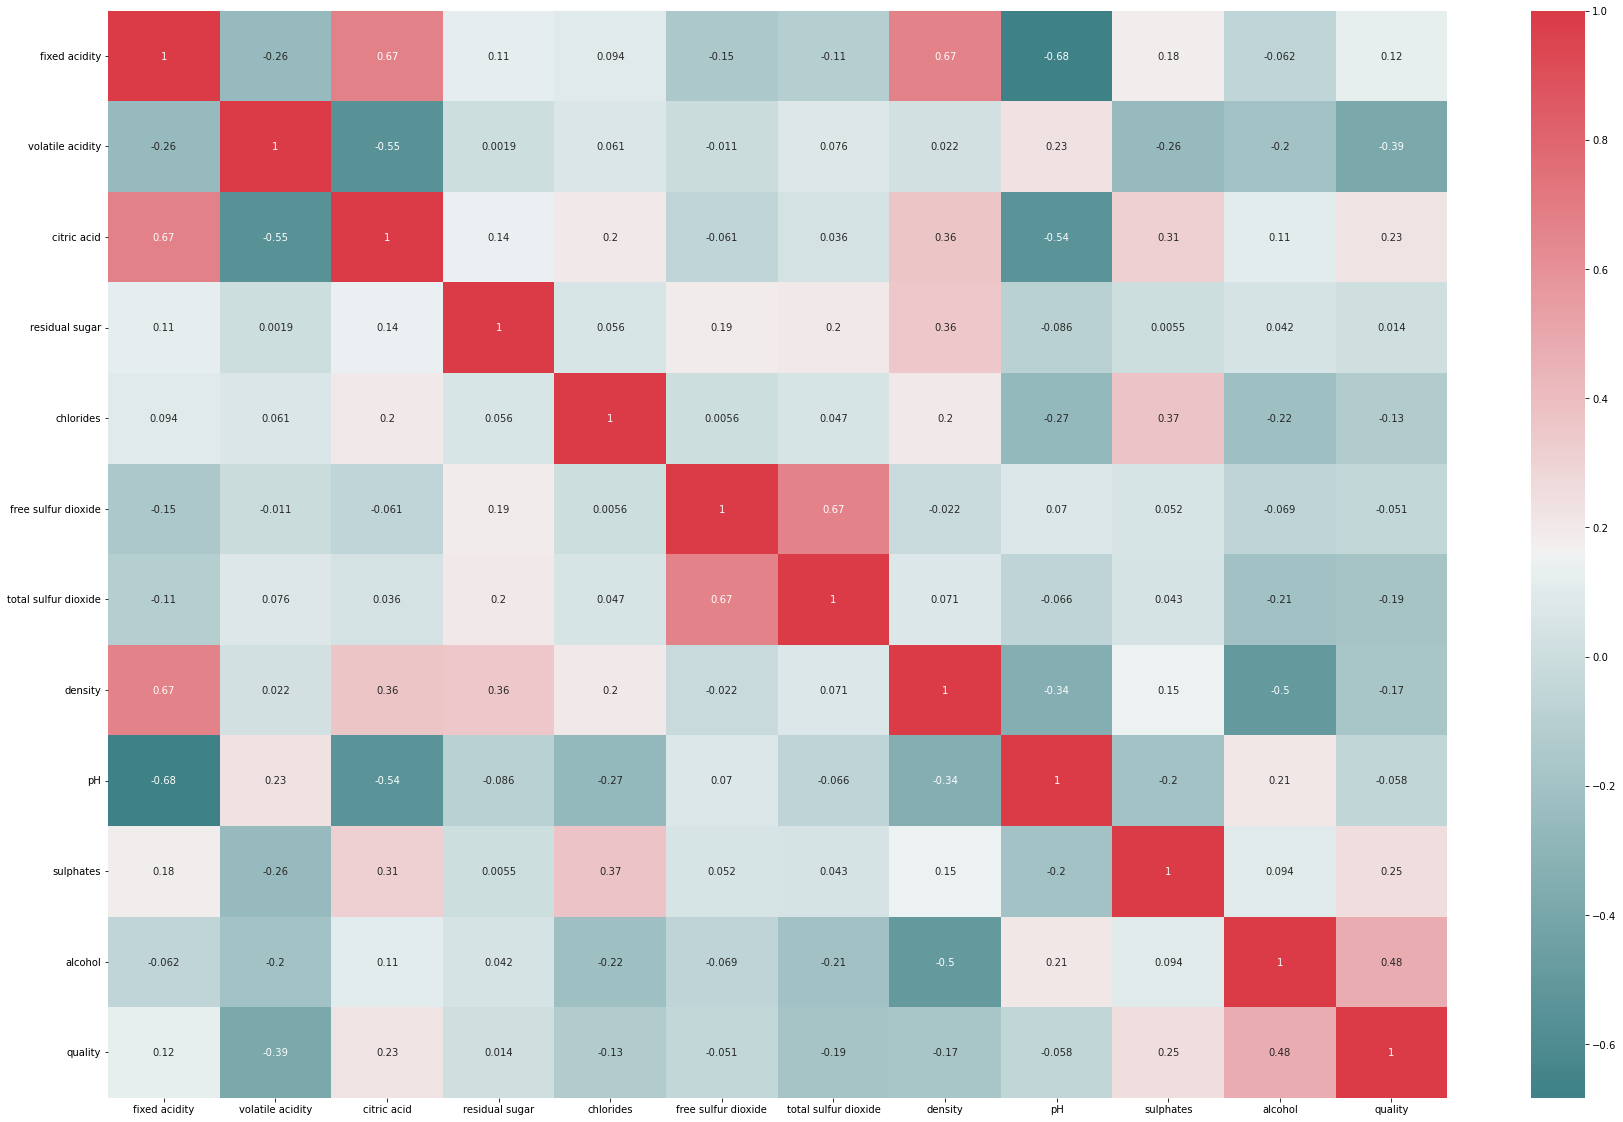

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,20))
corr = df.corr()
sns.heatmap(corr,annot=True,cmap=sns.diverging_palette(200, 10, as_cmap=True))
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


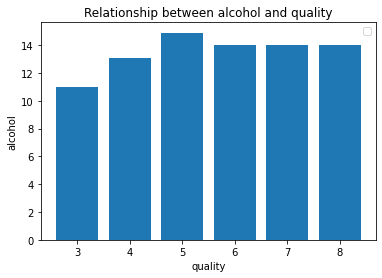

In [111]:
plt.bar(df['quality'], df['alcohol'])
plt.title('Relationship between alcohol and quality')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.legend()
plt.show()

In [112]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
normal_df = scaler.fit_transform(df)
normal_df = pd.DataFrame(normal_df, columns = df.columns)
print(normal_df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   
4             0.140845              0.098940  0.567548  0.606299   0.137725   

    alcohol  quality  
0  0.153846      0.4  
1  0.21538

In [113]:
df["good wine"] = ["yes" if i >= 7 else "no" for i in df['quality']]

In [114]:
X = normal_df.drop(["quality"], axis = 1)
y = df["good wine"]

In [115]:
y.value_counts()

no     1382
yes     217
Name: good wine, dtype: int64

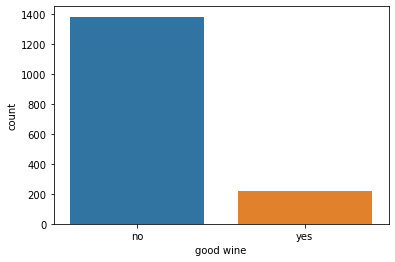

In [116]:
sns.countplot(y)
plt.show()

# Base

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2022, stratify=y)

In [118]:
from sklearn.dummy import DummyClassifier
dummy_classifier = DummyClassifier(strategy='most_frequent',random_state=2022)
dummy_classifier.fit(X_train,y_train)
acc_baseline = dummy_classifier.score(X_test,y_test)
print("Baseline Accuracy = ", acc_baseline)

Baseline Accuracy =  0.8645833333333334


# Random Forest

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
rf_model = RandomForestClassifier(random_state = 2022)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=2022)

In [120]:
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test,y_pred_rf)
print('Accuracy = ', acc_rf)

Accuracy =  0.9041666666666667


In [121]:
scores = cross_val_score(rf_model, X, y, cv=5)
print("Cross Validation Score: ",scores.mean())

Cross Validation Score:  0.8680466300940439


In [122]:
y_pred_train = rf_model.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_train))

1.0


In [123]:
print(rf_model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 2022, 'verbose': 0, 'warm_start': False}


In [124]:
from sklearn.model_selection import RandomizedSearchCV
random_grid = {'max_depth': [1, 5, 10, 15],
'n_estimators': [100,200,300,400,500,600]}
rf_random = RandomizedSearchCV(rf_model,random_grid, n_iter = 50, cv = 5,random_state = 2022)
rf_random.fit(X_train, y_train)
print(rf_random.best_params_)

{'n_estimators': 200, 'max_depth': 15}


In [125]:
from sklearn.model_selection import GridSearchCV
param_dist = {"max_depth":[10,11,12,13,14,15,16,17,18,19],      "n_estimators":[140,155,170,185,200,215,230,245,260]}
rf_cv = GridSearchCV(rf_model, param_dist, cv=5)
rf_cv.fit(X_train,y_train)
print(rf_cv.best_params_)

{'max_depth': 11, 'n_estimators': 185}


In [126]:
rf_new = RandomForestClassifier(n_estimators = 185, max_depth =  11, random_state = 2022)
rf_new.fit(X_train,y_train)
y_pred_rf = rf_new.predict(X_test)
acc_rf = accuracy_score(y_test,y_pred_rf)
print('Accuracy = ', acc_rf)
scores = cross_val_score(rf_new, X, y, cv=5)
print("Cross Validation Score: ",scores.mean())

Accuracy =  0.9125
Cross Validation Score:  0.8711775078369906


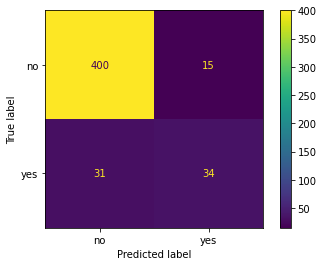

0.9125


In [127]:
from sklearn.metrics import plot_confusion_matrix
dt = RandomForestClassifier(random_state=2022)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
metrics.plot_confusion_matrix(dt, X_test, y_test)
plt.show()
print(metrics.accuracy_score(y_test, y_pred_rf))

In [128]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

          no       0.93      0.97      0.95       415
         yes       0.74      0.54      0.62        65

    accuracy                           0.91       480
   macro avg       0.84      0.75      0.79       480
weighted avg       0.91      0.91      0.91       480



# Importance

In [83]:
imp_rf = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_),columns = ["feature", "importance"])
imp_rf.set_index("feature", inplace=True)
imp_rf.sort_values(by = "importance", ascending = False, inplace = True)
imp_rf.head()

,importance
feature,
alcohol,0.166625
sulphates,0.121905
volatile acidity,0.106521
density,0.096270
total sulfur dioxide,0.083157


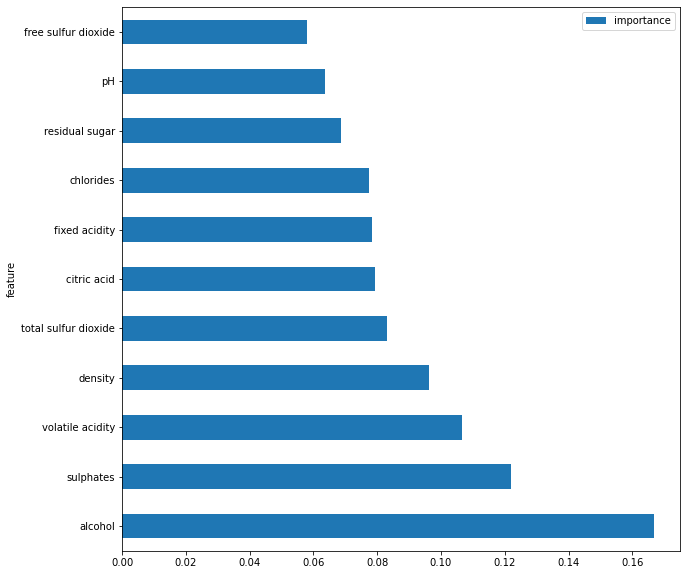

In [84]:
imp_rf.plot.barh(figsize=(10,10))
plt.show()

In [94]:
import numpy as np
print("Good Wine=",np.average(df[df["good wine"] == "yes"].alcohol))
print("Regular Wine=",np.average(df[df["good wine"] == "no"].alcohol))

Good Wine= 11.518049155145931
Regular Wine= 10.251037144235408


In [95]:
print("Good Wine=",np.average(df[df["good wine"] == "yes"].sulphates))
print("Regular Wine=",np.average(df[df["good wine"] == "no"].sulphates))

Good Wine= 0.7434562211981566
Regular Wine= 0.6447539797395079


In [96]:
df_good = df[df["good wine"] == "yes"]
df_bad = df[df["good wine"] == "no"]
print("Good Wine=",np.average(df_good["volatile acidity"]))
print("Regular Wine=",np.average(df_bad["volatile acidity"]))

Good Wine= 0.4055299539170507
Regular Wine= 0.5470224312590448


# SVM

In [65]:
from sklearn.svm import SVC
svc = SVC(random_state=2022)
svc.fit(X_train, y_train)

SVC(random_state=2022)

In [66]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
y_pred = svc.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8770833333333333


In [67]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svc, X, y, cv=5)
print(scores.mean())

0.8642927115987462


In [68]:
y_pred_train = svc.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_train))

0.8856121537086684


In [69]:
from sklearn.model_selection import RandomizedSearchCV
random_grid = {"C": [0.001,0.01,0.1,1,10,100,1000]}
svc_random = RandomizedSearchCV(svc,random_grid,cv=5,random_state=2022)
svc_random.fit(X_train, y_train)
print(svc_random.best_params_)

{'C': 100}


In [70]:
from sklearn.model_selection import GridSearchCV
param_dist = {'C': [80,90,100,110,120,130,140],
              'kernel':['linear', 'rbf','poly']}
svc_cv = GridSearchCV(svc, param_dist, cv=10)
svc_cv.fit(X_train,y_train)
print(svc_cv.best_params_)

{'C': 110, 'kernel': 'rbf'}


In [71]:
svc_new = SVC(C = 110, kernel = "rbf", random_state = 2022)
svc_new.fit(X_train, y_train)
y_pred_new = svc_new.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_new))

0.8916666666666667


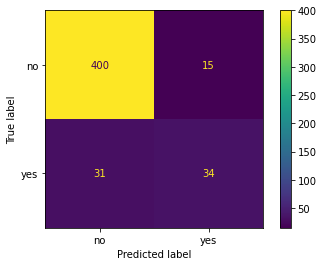

0.8916666666666667


In [72]:
from sklearn.metrics import plot_confusion_matrix
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
metrics.plot_confusion_matrix(dt, X_test, y_test)
plt.show()
print(metrics.accuracy_score(y_test, y_pred_new))

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

          no       0.93      0.95      0.94       415
         yes       0.61      0.54      0.57        65

    accuracy                           0.89       480
   macro avg       0.77      0.74      0.76       480
weighted avg       0.89      0.89      0.89       480



# Decision Tree

In [97]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=2022)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2022)

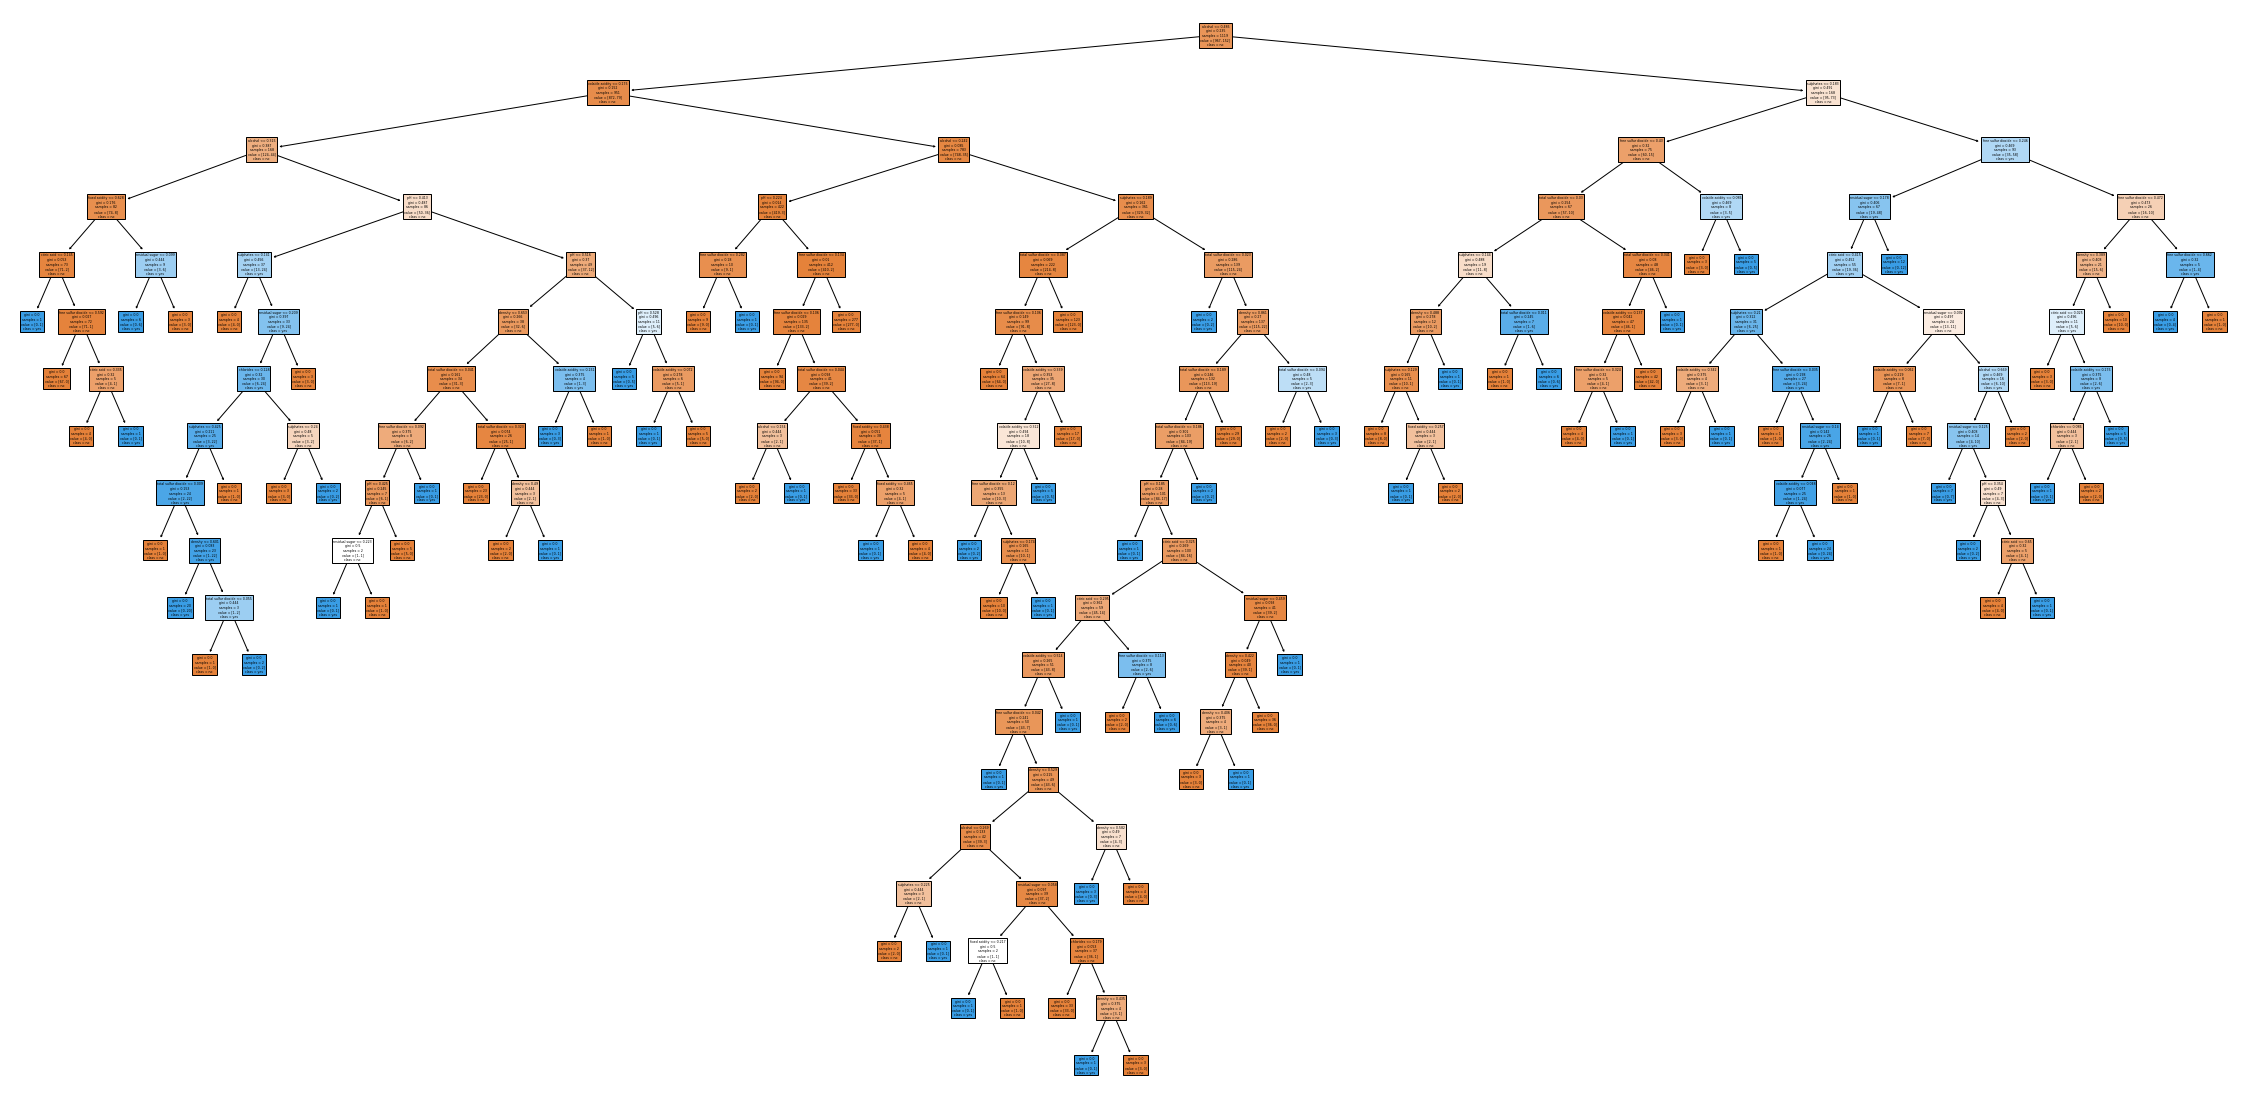

In [98]:
from sklearn import tree
plt.figure(figsize=(40,20))
fn = X.columns
cn = y.unique()
tree.plot_tree(dt, feature_names=fn, class_names=cn, filled=True)
plt.show()

In [99]:
scores = cross_val_score(dt, X, y, cv=5)
print("Cross Validation Score: ",scores.mean())

Cross Validation Score:  0.8048844043887149


In [100]:
y_pred_train = dt.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_train))

1.0


In [101]:
param_dist = {"max_depth": range(1,6),
              "max_features": range(1,10),
              "criterion": ["gini", "entropy"]}
dt_cv = GridSearchCV(dt, param_dist, cv=5)
dt_cv.fit(X_train,y_train)
print(dt_cv.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'max_features': 9}


In [102]:
dt_new = DecisionTreeClassifier(criterion = "gini",
                                max_depth = 4,
                                max_features = 9,
                                random_state = 2022)
dt_new.fit(X_train, y_train)
y_pred_new = dt_new.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_new))
scores = cross_val_score(dt_new, X, y, cv=5)
print("Cross Validation Score: ",scores.mean())

0.8791666666666667
Cross Validation Score:  0.8574059561128526


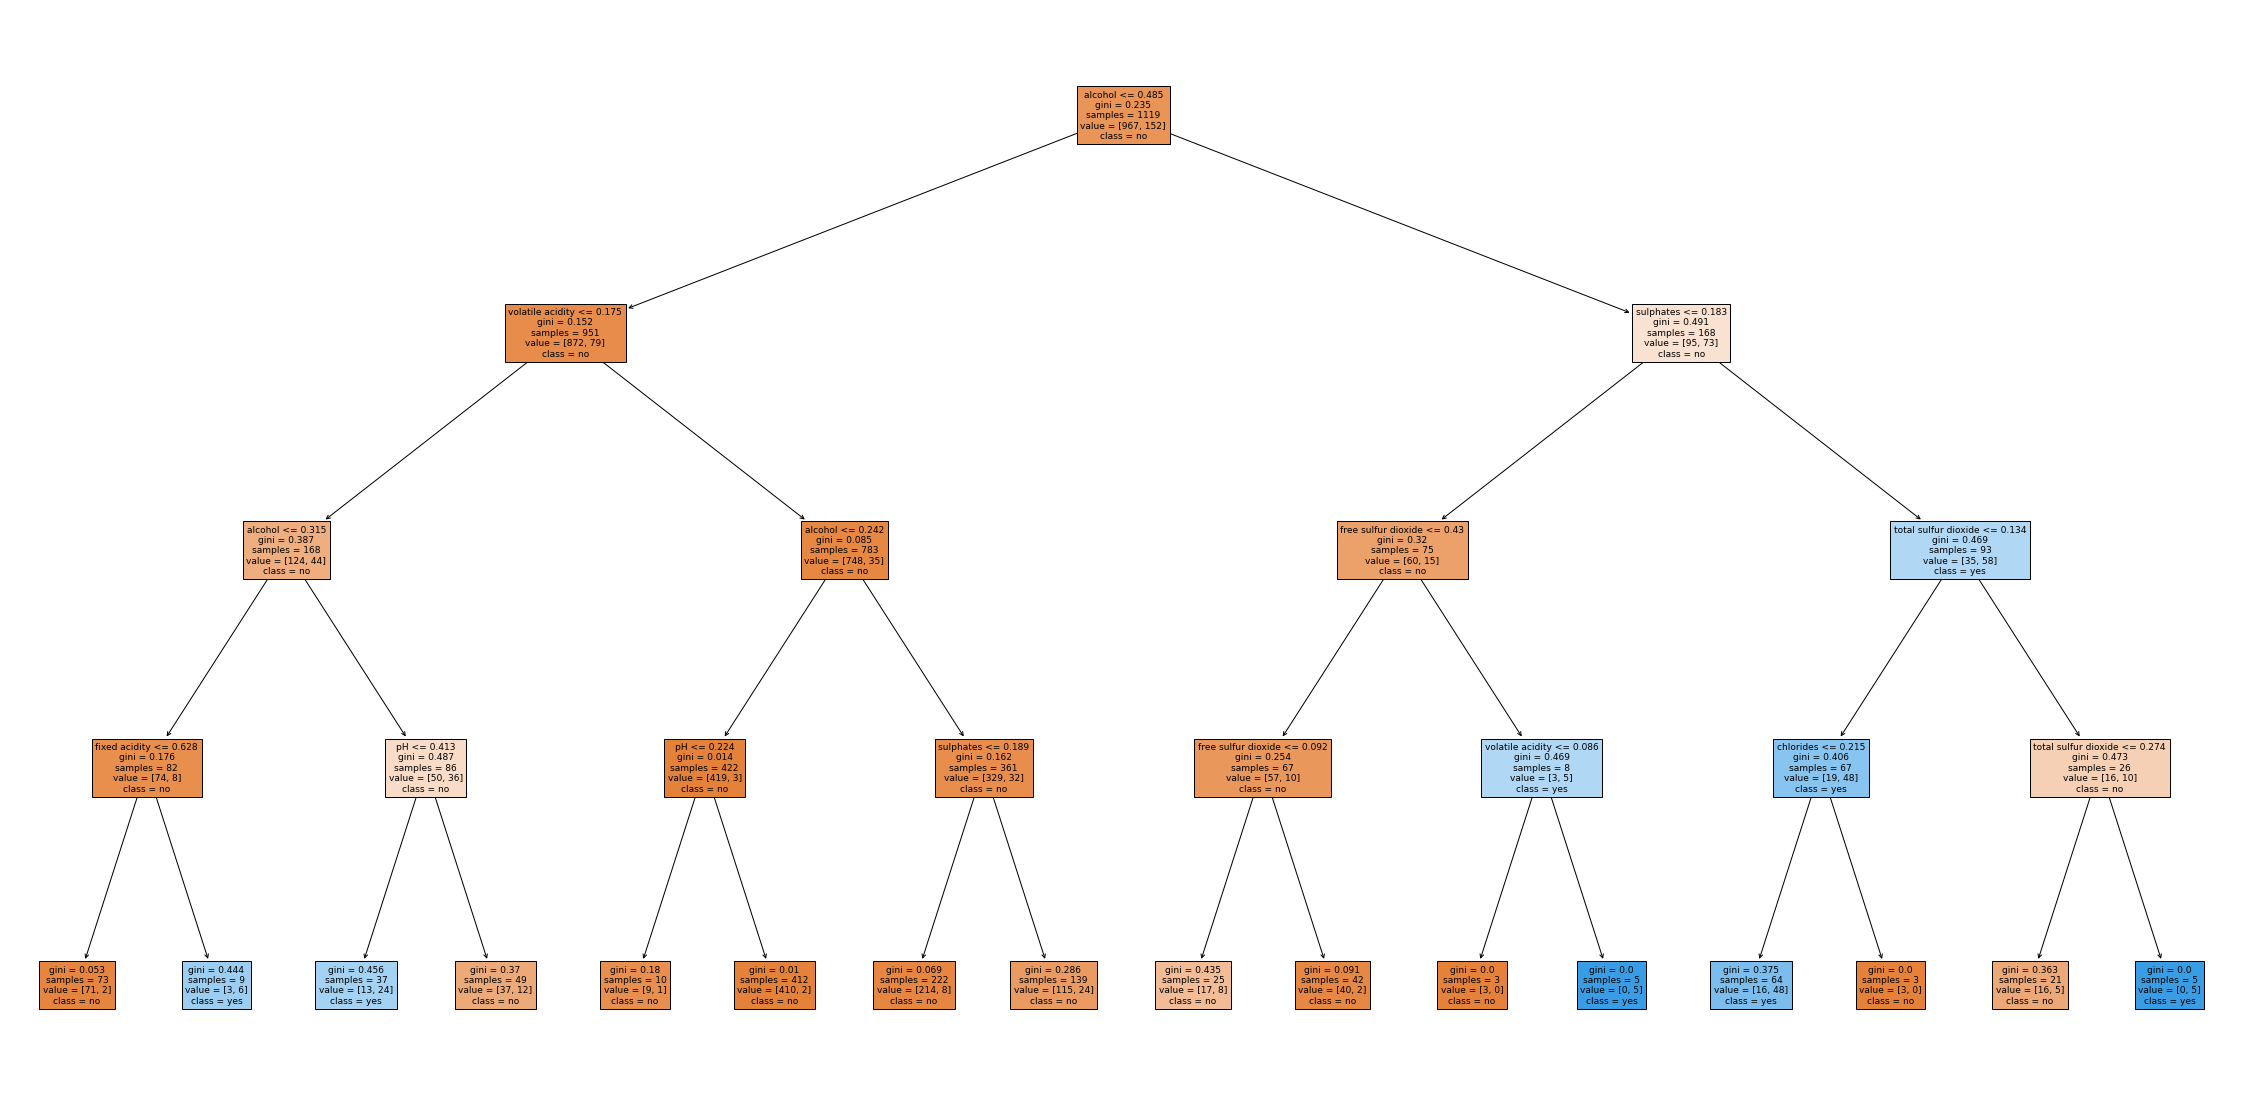

In [103]:
plt.figure(figsize=(40,20))
tree.plot_tree(dt_new, feature_names=fn, class_names=cn, filled=True)
plt.show()

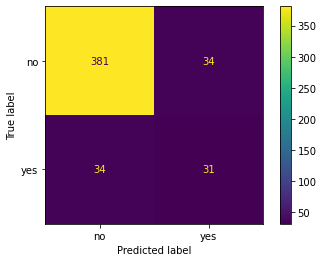

0.8791666666666667


In [104]:
y_pred = dt.predict(X_test)
metrics.plot_confusion_matrix(dt, X_test, y_test)
plt.show()
print(metrics.accuracy_score(y_test, y_pred_new))

In [105]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

          no       0.92      0.94      0.93       415
         yes       0.57      0.46      0.51        65

    accuracy                           0.88       480
   macro avg       0.74      0.70      0.72       480
weighted avg       0.87      0.88      0.87       480

